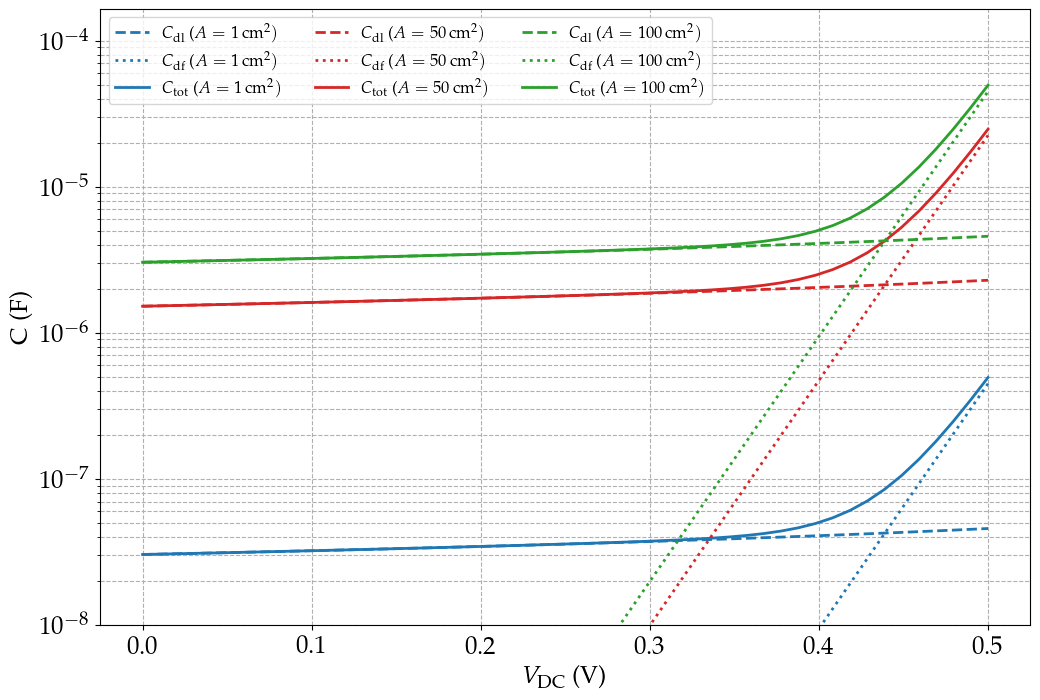

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
    "font.size" : 18,
    "lines.linewidth" : 2,
})

# Constants
Na = 1e16 * 1e6
Nd = 1e19 * 1e6
L = 300e-6
er = 11.68
eo = 8.854e-12
es = er * eo
T = 300
ni = 1e10 * 1e6
q = 1.6e-19
ktq = 0.0259
no = ni**2 / Na  # cm^-3
vbi = ktq * np.log(Na * Nd / ni**2)

# Capacitance functions
def c_depletion(v, A):
    num = q * es * Na * Nd
    denom = 2 * (Na + Nd) * (vbi - v)
    return A * np.sqrt(num / denom)

def c_diffusion(v, A):
    return A * q * L * no * np.exp(v / ktq) / ktq


v = np.linspace(0, 0.5, 50)


A_values = [1e-4, 50e-4, 100e-4]
colors = ['tab:blue', 'tab:red', 'tab:green']

plt.figure(figsize=(12,8))

for A, color in zip(A_values, colors):
    A_scaled = A * 1
    Cdl = c_depletion(v, A_scaled)
    Cdf = c_diffusion(v, A_scaled)
    plt.plot(v, Cdl, '--', color=color)
    plt.plot(v, Cdf, ':', color=color)
    plt.plot(v, Cdl + Cdf, '-', color=color)

plt.yscale('log')
plt.xlabel(r'$V_\mathrm{DC}$ (V)')
plt.ylabel("C (F)")
plt.ylim(1e-8)
plt.grid(True, which="both", ls="--")


line_styles = ['--', ':', '-']
line_labels = [r'$C_\mathrm{dl}$', r'$C_\mathrm{df}$', r'$C_\mathrm{tot}$']


handles = []
labels = []

for color, A in zip(colors, A_values):
    for ls, label in zip(line_styles, line_labels):
        handles.append(Line2D([0], [0], color=color, linestyle=ls))
        labels.append(f'{label} ($A={A*1e4:.0f}\\,\\mathrm{{cm^2}})$')


plt.legend(handles, labels, ncol=3, fontsize=12, loc='upper left')
plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
plt.show()


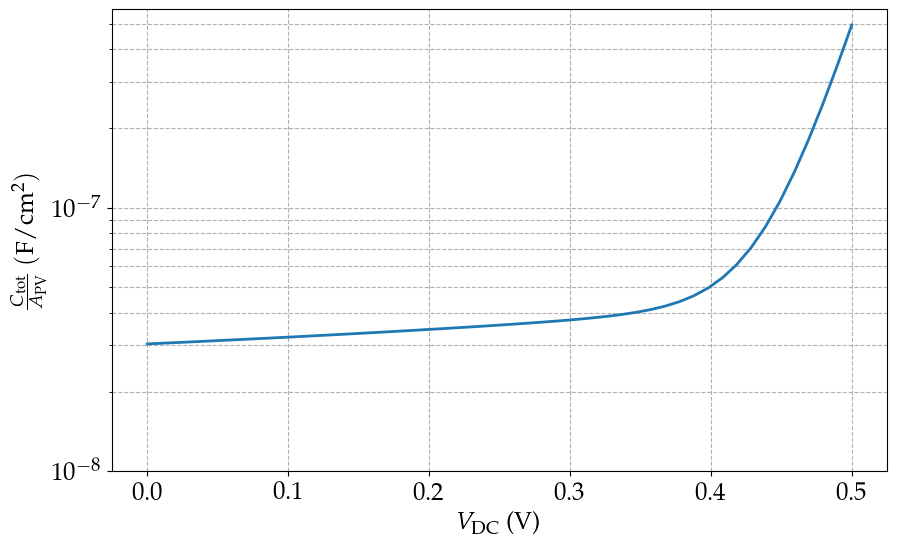

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
    "font.size" : 18,
    "lines.linewidth" : 2,
})

# Constants
Na = 1e16 * 1e6
Nd = 1e19 * 1e6
L = 300e-6
er = 11.68
eo = 8.854e-12
es = er * eo
T = 300
ni = 1e10 * 1e6
q = 1.6e-19
ktq = 0.0259
no = ni**2 / Na  # cm^-3
vbi = ktq * np.log(Na * Nd / ni**2)

# Capacitance functions
def c_depletion(v, A):
    num = q * es * Na * Nd
    denom = 2 * (Na + Nd) * (vbi - v)
    return A * np.sqrt(num / denom)

def c_diffusion(v, A):
    return A * q * L * no * np.exp(v / ktq) / ktq

# Voltage array
v = np.linspace(0, 0.5, 50)

# Areas and colors
A_values = [1e-4]
colors = ['tab:blue']

plt.figure(figsize=(10,6))

for A, color in zip(A_values, colors):
    A_scaled = A * 1
    Cdl = c_depletion(v, A_scaled)
    Cdf = c_diffusion(v, A_scaled)
    #plt.plot(v, Cdl, '--', color=color)
    #plt.plot(v, Cdf, ':', color=color)
    plt.plot(v, Cdl + Cdf, '-', color=color)

plt.yscale('log')
plt.xlabel(r'$V_\mathrm{DC}$ (V)')
plt.ylabel(r"$\frac{C_\mathrm{tot}}{A_\mathrm{PV}}$ $(\mathrm{F/cm^2})$")
plt.ylim(1e-8)
plt.grid(True, which="both", ls="--")


line_styles = ['--', ':', '-']
line_labels = [r'$C_\mathrm{dl}$', r'$C_\mathrm{df}$', r'$C_\mathrm{tot}$']


handles = []
labels = []

for color, A in zip(colors, A_values):
    for ls, label in zip(line_styles, line_labels):
        handles.append(Line2D([0], [0], color=color, linestyle=ls))
        labels.append(f'{label} ($A={A*1e4:.0f}\\,\\mathrm{{cm^2}})$')

# Legend with 3 columns
#plt.legend(handles, labels, ncol=3, fontsize=12, loc='upper left')
plt.savefig("cap_per_area.pdf", format="pdf", bbox_inches="tight")
plt.show()
